In [1]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
entry_data = pd.read_csv('entry_data.csv')
sales_data = pd.read_csv('sales_data.csv')
item_data = pd.read_csv('item_data.csv')
item_entry_data = pd.read_csv('item_entry_data.csv')

In [1]:
# entry_data 데이터 정보 확인하기
entry_data.head()

NameError: name 'entry_data' is not defined

In [4]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [34]:
temp_var['date'] = sales_data['결제일시'].str[:7]

In [20]:
temp_var['date'].head()

0    2022-04
1    2022-04
2    2022-04
3    2022-04
4    2022-04
Name: date, dtype: object

In [31]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
# [[YOUR CODE]]

# sales_data의 결제금액을 숫자형태로 바꾸기
# [[YOUR CODE]]

# temp_var의 결제금액열을 date 기준으로 집계하기
# [[YOUR CODE]]



sales_data['결제금액']=sales_data['결제금액'].str.replace(",",'').astype(int)

AttributeError: Can only use .str accessor with string values!

In [23]:
item_entry_data['결제금액']=sales_data['결제금액'].str.replace(",",'').astype(int)

AttributeError: Can only use .str accessor with string values!

In [28]:
payment_data = temp_var.groupby('date')['결제금액'].sum().reset_index()

In [29]:
payment_data

,date,결제금액
0,2021-02,7000
1,2021-03,2104500
2,2021-04,3116600
3,2021-05,2537000
4,2021-06,3621500
5,2021-07,1215000
6,2021-08,1229000
7,2021-09,1197500
8,2021-10,2138500
9,2021-11,2748500


In [36]:
# '판매수량'이 -1이 아닌 데이터만 선택
valid_sales_data = temp_var[temp_var['판매수량'] != -1]

# '상품명' 열에 대해 value_counts 메서드를 사용하여 상품별 판매 횟수를 계산
product_sales_count = valid_sales_data['상품명'].value_counts()

# 결과를 데이터프레임으로 변환
product_sales_df = product_sales_count.reset_index()

# 열 이름을 변경
product_sales_df.columns = ['상품명', '판매횟수']

# 상위 10개 상품을 선택
top10_products = product_sales_df.head(10)

In [38]:
top10_products

,상품명,판매횟수
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


In [91]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

font_list = [font.name for font in fm.fontManager.ttflist]
print(font_list)
plt.rcParams['font.family'] = 'Hancom Gothic'

['STIXSizeTwoSym', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'cmb10', 'cmmi10', 'cmr10', 'cmtt10', 'DejaVu Sans Mono', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans Mono', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Serif', 'STIXNonUnicode', 'STIXSizeOneSym', 'STIXSizeTwoSym', 'STIXSizeFiveSym', 'STIXGeneral', 'cmsy10', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXGeneral', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'STIXNonUnicode', 'DejaVu Serif', 'STIXSizeThreeSym', 'STIXGeneral', 'STIXSizeOneSym', 'STIXNonUnicode', 'cmss10', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Serif Display', 'DejaVu Sans', 'cmex10', 'STIXSizeFourSym', 'Arial Rounded MT Bold', 'Copperplate Gothic Light', 'Georgia', 'Microsoft PhagsPa', 'Verdana', 'Segoe UI Historic', 'Segoe Script', 'Calisto MT', 'Segoe UI', 'HCR Batang', 'Juice ITC', 'Gill Sans MT', 'Consolas', 'Edwardian Script ITC', 'Magic R', 'Tw Cen MT Condensed Extra Bold', 'Segoe UI', 'Leelawadee UI', 'HYPost-Medium', 'Lucida Sans', 'Imprint MT Shadow', 'Perpetua Titl

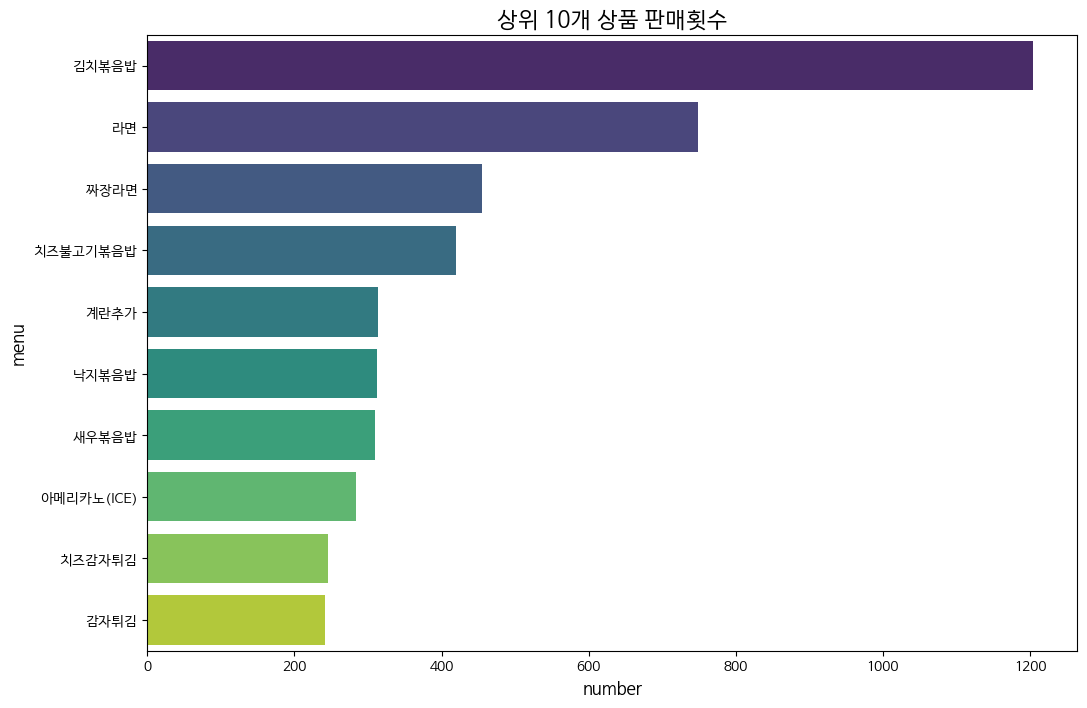

In [92]:

# Seaborn의 barplot 함수를 사용하여 상위 10개 상품의 판매 횟수를 바 차트로 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='판매횟수', y='상품명', data=top10_products, palette='viridis')

# 차트 제목과 레이블 추가
plt.title('상위 10개 상품 판매횟수', fontsize=16)
plt.xlabel('number', fontsize=12)
plt.ylabel('menu', fontsize=12)

# 차트 표시
plt.show()

In [93]:
import pandas as pd

# 데이터 로딩 (여러분의 데이터에 맞게 경로와 파일 이름을 수정하세요)111
# sales_data = pd.read_csv('your_data_file.csv')

# '판매 개수'와 '결제 금액' 열을 곱하여 새로운 '매출' 열을 생성
sales_data['매출'] = sales_data['판매수량'] * sales_data['결제금액']

# '상품명'으로 그룹화하고 '매출' 열의 합계를 계산
item_payment = sales_data.groupby('상품명')['매출'].sum().reset_index()

# '매출' 열을 기준으로 내림차순으로 정렬하고 상위 10개 항목을 선택
top10_products = item_payment.sort_values(by='매출', ascending=False).head(10)

# 결과 출력
print(top10_products)


           상품명       매출
13       김치볶음밥  6036900
23          라면  2967000
73    치즈불고기볶음밥  2309100
62        짜장라면  2044500
14       낙지볶음밥  1721700
43       새우볶음밥  1549800
72      치즈감자튀김  1359700
49  아메리카노(ICE)  1180100
9         감자튀김  1083800
39       불닭볶음면   697500


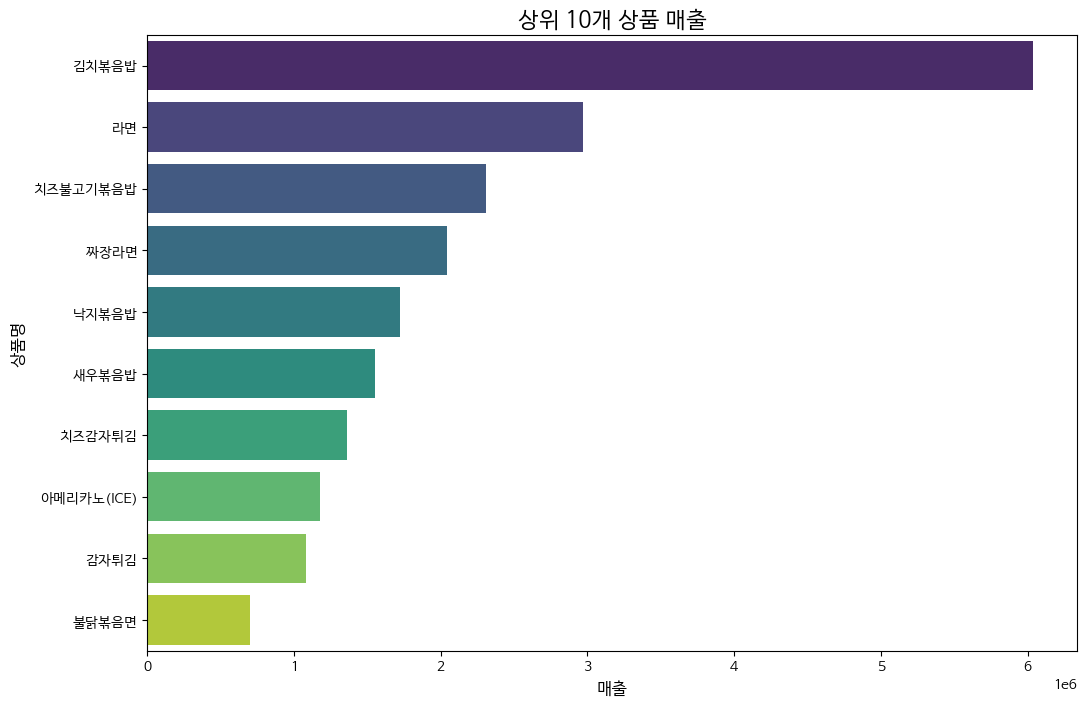

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상위 10개 상품의 매출을 바 차트로 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='매출', y='상품명', data=top10_products, palette='viridis')

# 차트 제목과 레이블 추가
plt.title('상위 10개 상품 매출', fontsize=16)
plt.xlabel('매출', fontsize=12)
plt.ylabel('상품명', fontsize=12)

# 차트 표시
plt.show()


In [95]:
import pandas as pd

# 데이터 로드 (데이터 경로와 파일 이름을 적절히 바꾸세요)
# entry_data = pd.read_csv('path/to/your/data.csv')

# 데이터를 temp_var로 정의
temp_var = entry_data.copy()

# 금액 열을 숫자형태로 변환 (금액 열 이름이 '금액'이라고 가정)
temp_var['금액'] = pd.to_numeric(temp_var['금액'], errors='coerce')

# 요금제명을 기준으로 금액을 집계
tickets = temp_var.groupby('요금제명')['금액'].sum().reset_index()

# 금액을 기준으로 내림차순 정렬하고 상위 10개를 도출
top10_tickets = tickets.sort_values(by='금액', ascending=False).head(10)

# 결과 출력
print(top10_tickets)


               요금제명        금액
21    한국대생 입장권(종일권)  70037000
17         입장권(종일권)  23570500
15  심야-조조무제한(06시까지)  11600000
14         심야-조조무제한   6221000
20     한국대생 무제한 입장권   5207500
11       시간요금제(1시간)   2665500
13       시간요금제(3시간)   2042000
5           무제한 입장권   1568600
0         18시이후 무제한   1330500
18            조조무제한    693000


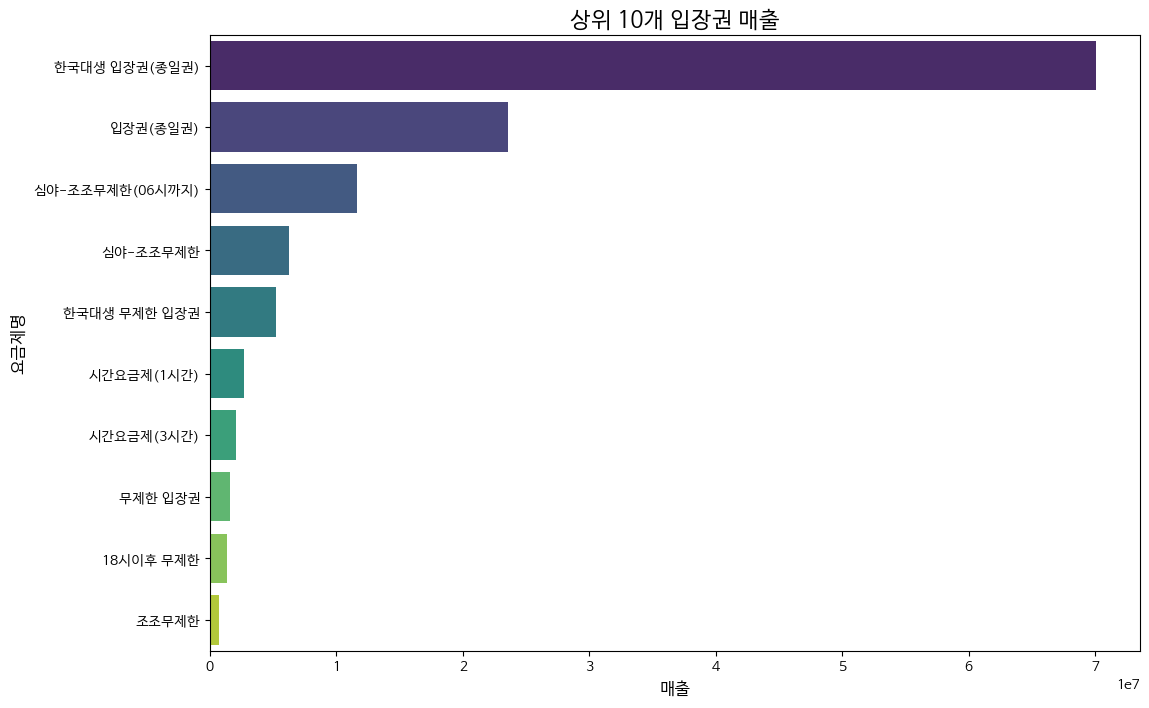

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
#a
# 상위 10개 입장권의 매출을 바 차트로 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='금액', y='요금제명', data=top10_tickets, palette='viridis')

# 차트 제목과 레이블 추가
plt.title('상위 10개 입장권 매출', fontsize=16)
plt.xlabel('매출', fontsize=12)
plt.ylabel('요금제명', fontsize=12)

# 차트 표시
plt.show()

# 가설 1. 오래 있는 사람들이 음식을 많이먹고, 특정 음식을 선호할 것이다.

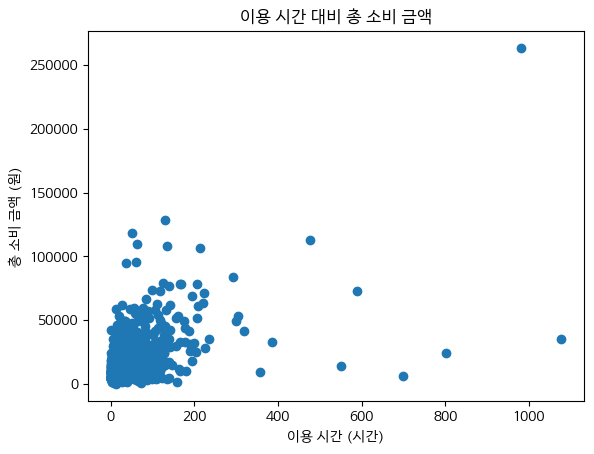

이용 시간과 총 소비 금액의 상관 계수: 0.4982272923386962


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
#3
# 데이터 로드
entry_data = pd.read_csv('entry_data.csv', parse_dates=['입실', '퇴실'])
sales_data = pd.read_csv('sales_data.csv', parse_dates=['결제일시'])

# 금액 데이터를 숫자형으로 변환
sales_data['결제금액'] = sales_data['결제금액'].str.replace('원', '').str.replace(',', '').astype(int)

# 각 고객의 총 이용 시간 계산
entry_data['이용시간'] = (entry_data['퇴실'] - entry_data['입실']).dt.total_seconds() / 3600
customer_stay_time = entry_data.groupby('고객')['이용시간'].sum().reset_index()

# 각 고객의 총 소비 금액 계산
customer_total_sales = sales_data.groupby('고객')['결제금액'].sum().reset_index()

# 두 데이터 프레임을 고객 열을 기준으로 병합
merged_data = pd.merge(customer_stay_time, customer_total_sales, on='고객')

# 데이터 시각화
plt.scatter(merged_data['이용시간'], merged_data['결제금액'])
plt.xlabel('이용 시간 (시간)')
plt.ylabel('총 소비 금액 (원)')
plt.title('이용 시간 대비 총 소비 금액')
plt.show()

# 상관 계수 계산
correlation = merged_data['이용시간'].corr(merged_data['결제금액'])
print(f'이용 시간과 총 소비 금액의 상관 계수: {correlation}')


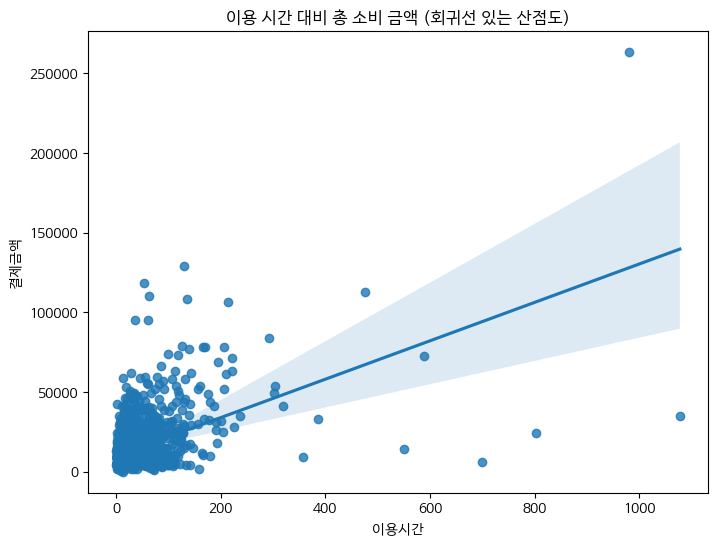

In [125]:
# 회귀선이 있는 산점도
plt.figure(figsize=(8, 6))
sns.regplot(x='이용시간', y='결제금액', data=merged_data)
plt.title('이용 시간 대비 총 소비 금액 (회귀선 있는 산점도)')
plt.show()

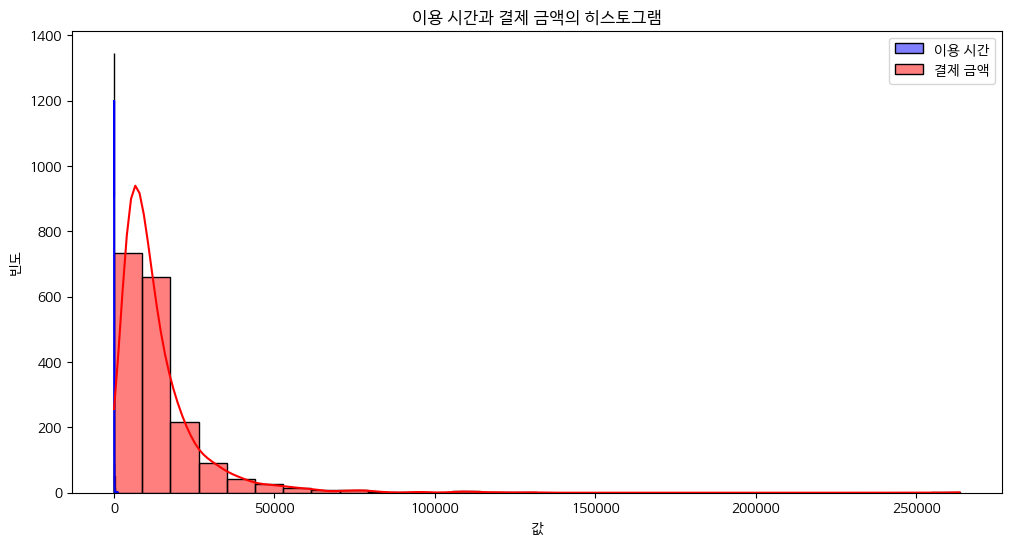

In [126]:

# 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['이용시간'], bins=30, kde=True, color='blue', label='이용 시간')
sns.histplot(merged_data['결제금액'], bins=30, kde=True, color='red', label='결제 금액')
plt.xlabel('값')
plt.ylabel('빈도')
plt.legend()
plt.title('이용 시간과 결제 금액의 히스토그램')
plt.show()

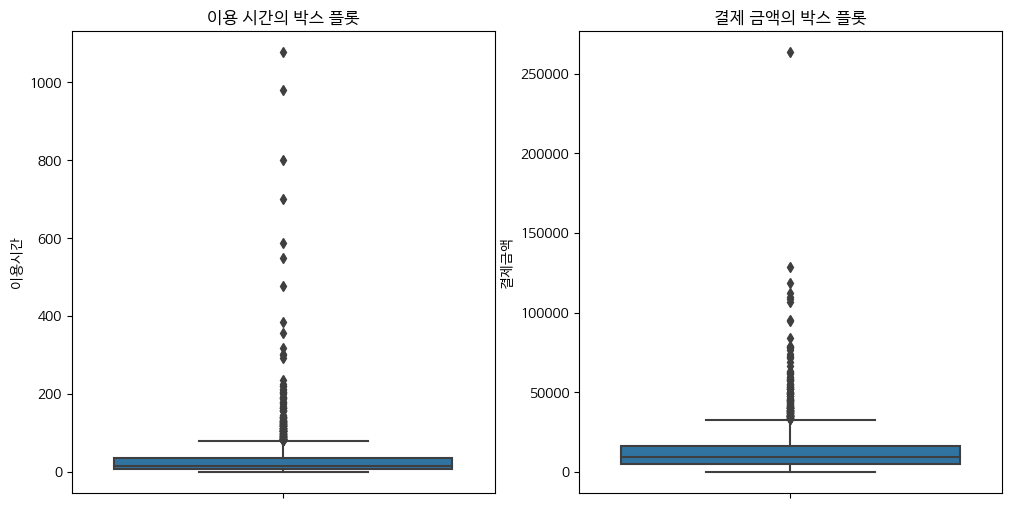

In [127]:

# 박스 플롯
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=merged_data['이용시간'], ax=ax[0])
sns.boxplot(y=merged_data['결제금액'], ax=ax[1])
ax[0].set_title('이용 시간의 박스 플롯')
ax[1].set_title('결제 금액의 박스 플롯')
plt.show()

C:\Users\lgw33\AppData\Local\Temp\ipykernel_53800\1080750597.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_data.corr()


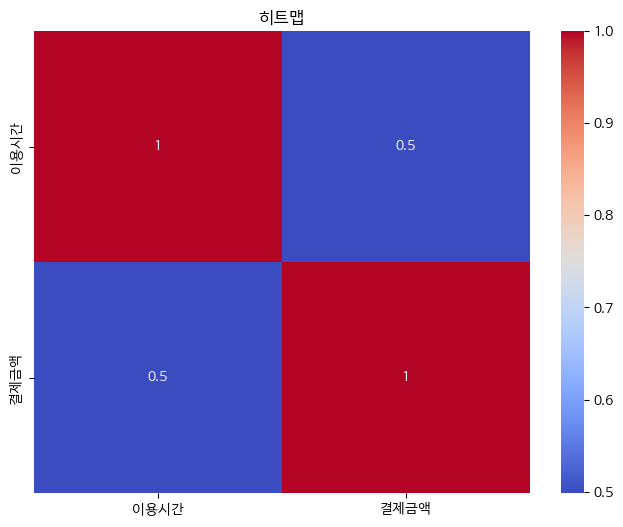

In [128]:

# 히트맵 (상관 행렬을 이용)
plt.figure(figsize=(8, 6))
corr = merged_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('히트맵')
plt.show()


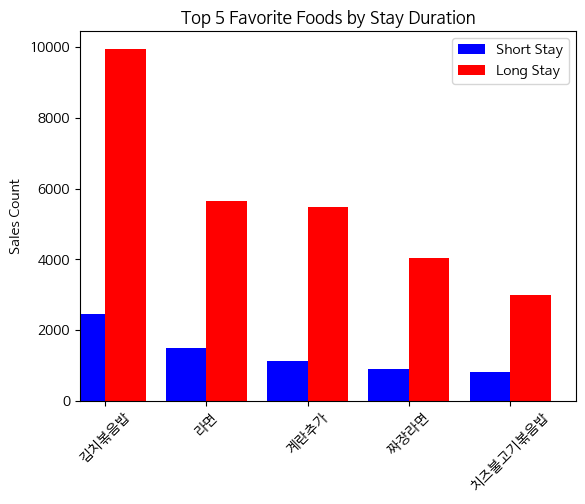

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기 (CSV 파일 경로는 실제 파일 경로로 변경해야 합니다.)
entry_data = pd.read_csv('entry_data.csv', parse_dates=['입실', '퇴실'])
sales_data = pd.read_csv('sales_data.csv', parse_dates=['결제일시'])

# 이용 시간 칼럼 생성
entry_data['이용시간'] = (entry_data['퇴실'] - entry_data['입실']).dt.total_seconds() / 3600  # 시간 단위로 변경

# 고객별 이용 시간과 구매 데이터 병합
merged_data = pd.merge(sales_data, entry_data, on='고객', how='inner')

# 이용 시간 기준으로 고객 그룹 나누기 (예: 2시간을 기준으로 오래 머문 고객과 짧게 머문 고객으로 분류)
short_stay = merged_data[merged_data['이용시간'] <= 3]
long_stay = merged_data[merged_data['이용시간'] > 3]

# 각 그룹의 상위 5개 음식 항목 찾기
short_stay_top5_food = short_stay['상품명'].value_counts().nlargest(5)
long_stay_top5_food = long_stay['상품명'].value_counts().nlargest(5)

# 결과를 바 차트로 시각화
fig, ax = plt.subplots()

# 짧게 머무는 고객의 상위 5개 음식 항목
short_stay_top5_food.plot(kind='bar', ax=ax, position=1, width=0.4, color='blue', label='Short Stay')

# 오래 머무는 고객의 상위 5개 음식 항목
long_stay_top5_food.plot(kind='bar', ax=ax, position=0, width=0.4, color='red', label='Long Stay')

plt.ylabel('Sales Count')
plt.title('Top 5 Favorite Foods by Stay Duration')
plt.xticks(rotation=45)  # X축 레이블을 회전하여 가독성 향상
plt.legend()
plt.show()
#계란 가격에 순이익이 계란 가격에 영향을 많이 받을 것이다. 계란은 어느 음식에도 들어가도 좋은 만능음식이다.

## 김치볶음밥은 왜 무적인가 ? top5의 평균가격을 비교

Short stay top 5 foods average price: 3890.33원
Long stay top 5 foods average price: 3890.33원


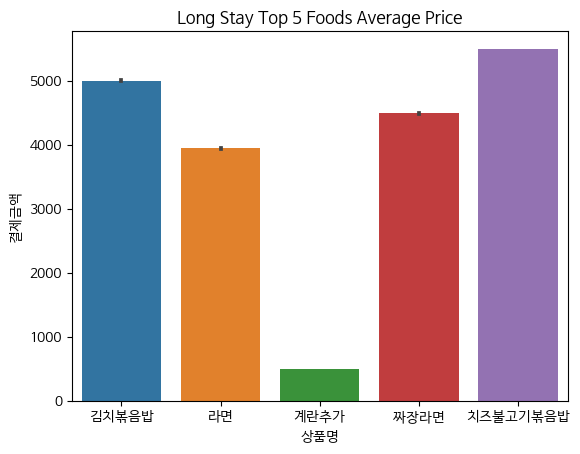

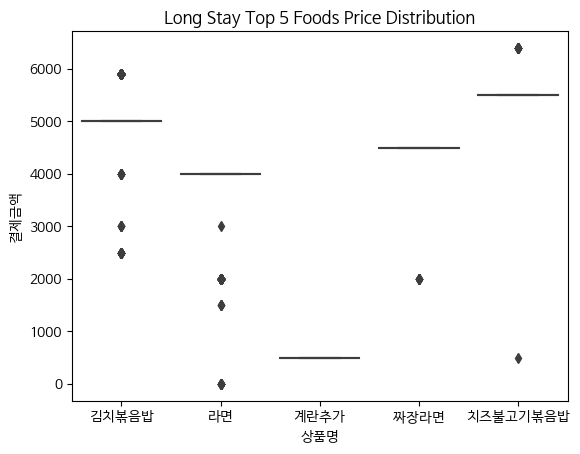

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#


# 데이터 불러오기 (CSV 파일 경로는 실제 파일 경로로 변경해야 합니다.)
entry_data = pd.read_csv('entry_data.csv', parse_dates=['입실', '퇴실'])
sales_data = pd.read_csv('sales_data.csv', parse_dates=['결제일시'])

# 이용 시간 칼럼 생성
entry_data['이용시간'] = (entry_data['퇴실'] - entry_data['입실']).dt.total_seconds() / 3600  # 시간 단위로 변경

# 고객별 이용 시간과 구매 데이터 병합
merged_data = pd.merge(sales_data, entry_data, on='고객', how='inner')
merged_data['결제금액'] = merged_data['결제금액'].str.replace(',', '').astype(int)
avg_price_per_product = merged_data.groupby('상품명')['결제금액'].mean()
# 이용 시간 기준으로 고객 그룹 나누기 (예: 2시간을 기준으로 오래 머문 고객과 짧게 머문 고객으로 분류)
short_stay = merged_data[merged_data['이용시간'] <= 2]
long_stay = merged_data[merged_data['이용시간'] > 2]

# 상품별 평균 가격 구하기
avg_price_per_product = merged_data.groupby('상품명')['결제금액'].mean()

# 각 그룹의 상위 5개 음식 항목 찾기
short_stay_top5_food = short_stay['상품명'].value_counts().nlargest(5).index.tolist()
long_stay_top5_food = long_stay['상품명'].value_counts().nlargest(5).index.tolist()

# 상위 5개 음식 항목의 평균 가격 찾기
short_stay_top5_avg_price = avg_price_per_product[short_stay_top5_food].mean()
long_stay_top5_avg_price = avg_price_per_product[long_stay_top5_food].mean()

print(f"Short stay top 5 foods average price: {short_stay_top5_avg_price:.2f}원")
print(f"Long stay top 5 foods average price: {long_stay_top5_avg_price:.2f}원")

# 데이터 시각화
plt.figure()
sns.barplot(x='상품명', y='결제금액', data=merged_data, order=long_stay_top5_food)
plt.title('Long Stay Top 5 Foods Average Price')
plt.show()

plt.figure()
sns.boxplot(x='상품명', y='결제금액', data=merged_data, order=long_stay_top5_food)
plt.title('Long Stay Top 5 Foods Price Distribution')
plt.show()



In [0]:
#가격이 김치볶음밥이 2번째로 평균가격이 높음에도 불구하고 시간상관 음식이 1위를 차지했다. 이에 비해 치즈불고기볶음밥은 시간 상관 음식에서 5위를 기록했다. 이처럼 김치 볶음밥의 맛의 이점이 크다고 생각할 수 있다.

In [0]:
# 김치 볶음밥의 원재료의 단가를 줄일 수 있는 방법으로 수급처를 정하되 맛은 변하면 안된다. 백종원 전략, 선택과 집중

In [151]:
# git lfs track "classic/df_ibk.csv"
# git lfs track "classic/df_concert.csv"
# git lfs track "classic/2023빅콘테스트_어드밴스드리그_예술의전당.csv"
# git add .gitattributes
# git commit -m "Add Git LFS tracking"
# git add .gitattributes
# git commit -m "Add Git LFS tracking"
# git add classic/df_ibk.csv classic/df_concert.csv classic/2023빅콘테스트_어드밴스드리그_예술의전당.csv
# git commit -m "Add large files"
# git push origin main
#git bash 명령어, 대용량 파일 푸쉬하기 위함

SyntaxError: invalid decimal literal (1318157144.py, line 8)

### 김치볶음밥 비즈니스 전략

#### 1. 국제 경제학의 기본 원칙

김치 수요,공급 시장에서의 수요와 공급, 환율 변동의 영향, 국제 금융 및 투자의 흐름, 그리고 김치가 국제적으로 영향을 미치는 정책과 규제 등이 있습니다.

#### 2. 선물 계약 및 헤지 전략을 통한 리스크 관리

- **선물 계약**: 김치의 주요 재료로 사용되는 배추, 고추가루 등의 원자재에 대한 선물 계약을 맺어 미래의 가격 변동 위험에서 보호 받을 수 있습니다. 선물 계약은 미리 정해진 가격으로 미래에 원재료를 구매하거나 판매하는 계약입니다.

- **헤지 전략**: 김치의 주요 재료 가격이 상승할 것으로 예상되는 경우, 헤지 전략을 통해 재료 가격의 상승 리스크를 관리할 수 있습니다. 예를 들어, 재료 가격이 상승할 것으로 예상되는 시기에 선물 계약을 맺어 놓으면, 가격 상승에 따른 부담을 줄일 수 있습니다.

#### 3. 원재료의 특성과 외산 vs 국산의 영향

- **맛의 차이**: 국산과 외산 김치의 원재료는 맛에 큰 영향을 미칩니다. 국산 배추는 단맛이 강하고 신선하며, 외산 배추는 그렇지 않을 수 있습니다. 단맛, 짠맛, 쓴맛 등의 균형이 중요하며, 원재료의 품질은 이러한 균형을 결정짓습니다.

- **원재료의 선택**: 김치볶음밥의 특별한 맛을 유지하려면 고품질의 김치를 사용해야 합니다. 김치 제조사는 원재료의 질을 확실히 파악하고, 외산과 국산 재료를 적절히 조합하여 최상의 맛을 창출해야 합니다.

### 결론

백종원 전략의 "선택과 집중"을 활용하여, 김치볶음밥의 원재료 단가를 줄이면서도 맛을 유지하는 전략을 세울 수 있습니다. 이러한 전략은 김치볶음밥의 재료 구매에 대한 깊은 이해와 국제 경제학의 기본 원칙을 기반으로 합니다. 김치의 주요 재료에 대한 선물 계약 및 헤지 전략을 활용하여, 가격 변동 리스크를 관리하고 김치볶음밥 비즈니스를 더욱 견고하게 만들 수 있습니다.


SyntaxError: invalid syntax (973487878.py, line 1)